In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Set device for GPU acceleration if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [2]:
torch.manual_seed(42)
np.random.seed(42)

In [3]:
train_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor (0-1 range)
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

In [4]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


In [5]:
viz_transform = transforms.Compose([
    transforms.ToTensor()
])

In [6]:
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=train_transform
)


test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=test_transform
)


viz_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=False,
    transform=viz_transform
)


100%|██████████| 9.91M/9.91M [00:00<00:00, 11.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 349kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.79MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.01MB/s]


In [7]:
batch_size = 64

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

viz_loader = DataLoader(
    viz_dataset,
    batch_size=batch_size,
    shuffle=True
)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Classes: {train_dataset.classes}")

Training samples: 60000
Test samples: 10000
Number of classes: 10
Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [8]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

print(f"\nTraining data shape analysis:")
print(f"Batch shape: {images.shape}")
print(f"Single image shape: {images[0].shape}")
print(f"Labels shape: {labels.shape}")
print(f"Image data type: {images.dtype}")
print(f"Image value range: [{images.min():.3f}, {images.max():.3f}]")



Training data shape analysis:
Batch shape: torch.Size([64, 1, 28, 28])
Single image shape: torch.Size([1, 28, 28])
Labels shape: torch.Size([64])
Image data type: torch.float32
Image value range: [-0.424, 2.821]


In [9]:
viz_iter = iter(viz_loader)
viz_images, viz_labels = next(viz_iter)

print(f"\nVisualization data (unnormalized):")
print(f"Image value range: [{viz_images.min():.3f}, {viz_images.max():.3f}]")



Visualization data (unnormalized):
Image value range: [0.000, 1.000]


In [11]:
def visualize_dataset(data_loader, num_images=8, title="MNIST Dataset Samples"):
    """
    Visualize samples from the dataset
    """

    data_iter = iter(data_loader)
    images, labels = next(data_iter)


    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    fig.suptitle(title, fontsize=16)

    for i in range(num_images):
        row = i // 4
        col = i % 4

        img = images[i].squeeze().numpy()



        axes[row, col].imshow(img, cmap='gray')
        axes[row, col].set_title(f'Label: {labels[i]}')
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()


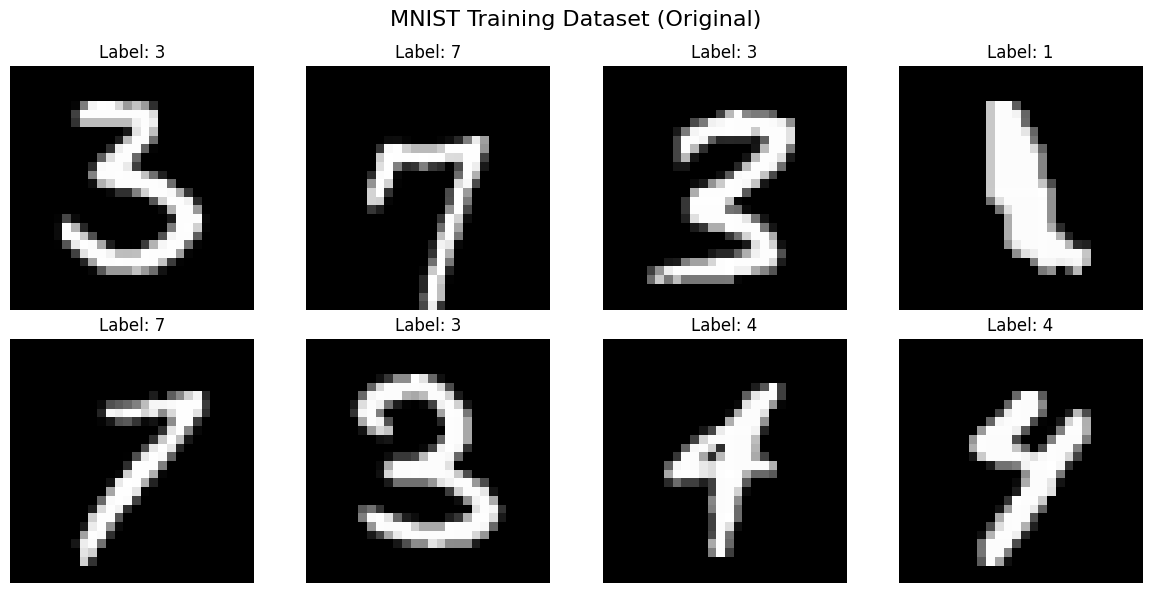

In [13]:
visualize_dataset(viz_loader, title="MNIST Training Dataset (Original)")

In [14]:
train_labels = [train_dataset[i][1] for i in range(len(train_dataset))]
class_counts = Counter(train_labels)

print(f"\nClass distribution in training set:")
for digit in sorted(class_counts.keys()):
    print(f"Digit {digit}: {class_counts[digit]} samples")



Class distribution in training set:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


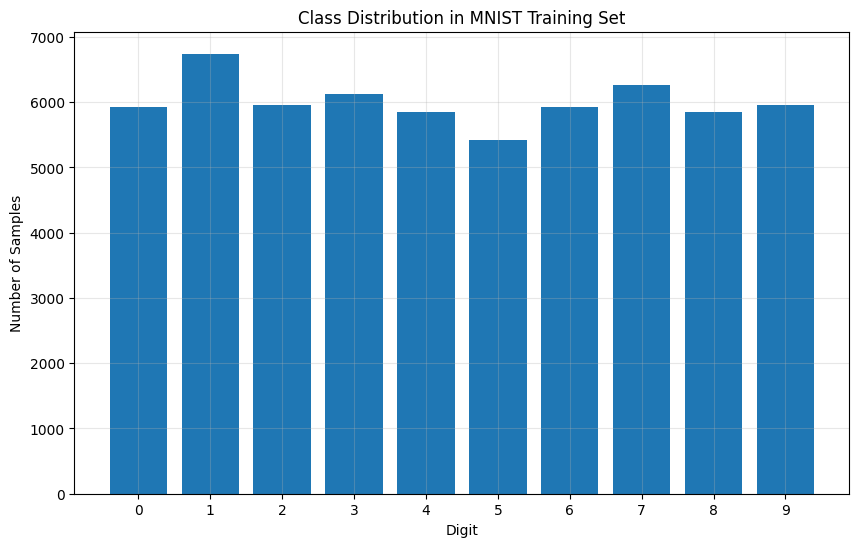

In [15]:
plt.figure(figsize=(10, 6))
digits = list(range(10))
counts = [class_counts[digit] for digit in digits]
plt.bar(digits, counts)
plt.xlabel('Digit')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Training Set')
plt.xticks(digits)
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
print("""
## Preprocessing Steps Justification:

1. **ToTensor() Transform**: Converts PIL Images to PyTorch tensors and scales pixel values from [0, 255] to [0, 1].
   This is essential as neural networks work with tensor data and normalized inputs train better.

2. **Normalization**: Applied with mean=0.1307 and std=0.3081 (MNIST dataset statistics).
   This centers the data around zero and standardizes the scale, leading to:
   - Faster convergence during training
   - Better gradient flow
   - More stable training process

3. **Flattening**: Will be handled in the neural network's forward pass by reshaping 28x28 images to 784-dimensional vectors.
   This is necessary for fully connected layers that expect 1D input.

4. **No Additional Preprocessing Needed**: MNIST images are already:
   - Grayscale (single channel)
   - Centered and size-normalized (28x28)
   - Clean with minimal noise
   - Properly segmented digits
""")


## Preprocessing Steps Justification:

1. **ToTensor() Transform**: Converts PIL Images to PyTorch tensors and scales pixel values from [0, 255] to [0, 1].
   This is essential as neural networks work with tensor data and normalized inputs train better.

2. **Normalization**: Applied with mean=0.1307 and std=0.3081 (MNIST dataset statistics).
   This centers the data around zero and standardizes the scale, leading to:
   - Faster convergence during training
   - Better gradient flow
   - More stable training process

3. **Flattening**: Will be handled in the neural network's forward pass by reshaping 28x28 images to 784-dimensional vectors.
   This is necessary for fully connected layers that expect 1D input.

4. **No Additional Preprocessing Needed**: MNIST images are already:
   - Grayscale (single channel)
   - Centered and size-normalized (28x28)
   - Clean with minimal noise
   - Properly segmented digits



In [17]:
class MNISTClassifier(nn.Module):
    """
    Neural Network for MNIST digit classification
    Architecture: 784 -> 512 -> 256 -> 128 -> 10
    """
    def __init__(self, input_size=784, hidden_sizes=[512, 256, 128], num_classes=10, dropout_rate=0.2):
        super(MNISTClassifier, self).__init__()


        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.dropout1 = nn.Dropout(dropout_rate)


        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.dropout2 = nn.Dropout(dropout_rate)


        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.dropout3 = nn.Dropout(dropout_rate)


        self.fc4 = nn.Linear(hidden_sizes[2], num_classes)

    def forward(self, x):

        x = x.view(x.size(0), -1)


        x = F.relu(self.fc1(x))
        x = self.dropout1(x)


        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        x = F.relu(self.fc3(x))
        x = self.dropout3(x)


        x = self.fc4(x)


        return F.log_softmax(x, dim=1)


In [18]:
model = MNISTClassifier().to(device)


print("Model Architecture:")
print(model)

Model Architecture:
MNISTClassifier(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)


In [19]:
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")



Total parameters: 567,434
Trainable parameters: 567,434


In [20]:
criterion = nn.NLLLoss()

In [21]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

In [22]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)

print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Learning rate scheduler: {scheduler}")

Loss function: NLLLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    initial_lr: 0.001
    lr: 0.001
    maximize: False
    weight_decay: 0.0001
)
Learning rate scheduler: <torch.optim.lr_scheduler.StepLR object at 0x7b203f05fd10>


In [23]:
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=20, device=device):
    """
    Train the neural network
    """
    model.train()
    train_losses = []
    train_accuracies = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (data, target) in enumerate(train_loader):

            data, target = data.to(device), target.to(device)


            optimizer.zero_grad()


            output = model(data)


            loss = criterion(output, target)


            loss.backward()


            optimizer.step()


            running_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()


            if batch_idx % 200 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, '
                      f'Loss: {loss.item():.4f}')


        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)


        scheduler.step()

        print(f'Epoch {epoch+1}/{num_epochs} completed - '
              f'Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, '
              f'LR: {scheduler.get_last_lr()[0]:.6f}')

    return train_losses, train_accuracies


In [26]:
### Evaluation Function
def evaluate_model(model, test_loader, device=device):
    """
    Evaluate the model on test set
    """
    model.eval()
    correct = 0
    total = 0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = torch.max(output, 1)

            total += target.size(0)
            correct += (predicted == target).sum().item()

            # Per-class accuracy
            c = (predicted == target).squeeze()
            for i in range(target.size(0)):
                label = target[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    # Overall accuracy
    accuracy = 100 * correct / total

    # Per-class accuracy
    class_accuracies = []
    for i in range(10):
        if class_total[i] > 0:
            class_acc = 100 * class_correct[i] / class_total[i]
            class_accuracies.append(class_acc)
            print(f'Accuracy of digit {i}: {class_acc:.2f}%')

    print(f'\nOverall Test Accuracy: {accuracy:.2f}%')
    return accuracy, class_accuracies



In [27]:
print("Starting model training...")
train_losses, train_accuracies = train_model(
    model, train_loader, criterion, optimizer, scheduler, num_epochs=25
)

Starting model training...
Epoch 1/25, Batch 0/938, Loss: 2.2945
Epoch 1/25, Batch 200/938, Loss: 0.4122
Epoch 1/25, Batch 400/938, Loss: 0.1414
Epoch 1/25, Batch 600/938, Loss: 0.1856
Epoch 1/25, Batch 800/938, Loss: 0.1145
Epoch 1/25 completed - Loss: 0.2767, Accuracy: 91.50%, LR: 0.001000
Epoch 2/25, Batch 0/938, Loss: 0.1667
Epoch 2/25, Batch 200/938, Loss: 0.0960
Epoch 2/25, Batch 400/938, Loss: 0.3030
Epoch 2/25, Batch 600/938, Loss: 0.0226
Epoch 2/25, Batch 800/938, Loss: 0.1003
Epoch 2/25 completed - Loss: 0.1294, Accuracy: 96.16%, LR: 0.001000
Epoch 3/25, Batch 0/938, Loss: 0.1692
Epoch 3/25, Batch 200/938, Loss: 0.1427
Epoch 3/25, Batch 400/938, Loss: 0.1301
Epoch 3/25, Batch 600/938, Loss: 0.0353
Epoch 3/25, Batch 800/938, Loss: 0.0524
Epoch 3/25 completed - Loss: 0.1022, Accuracy: 96.88%, LR: 0.001000
Epoch 4/25, Batch 0/938, Loss: 0.1865
Epoch 4/25, Batch 200/938, Loss: 0.0479
Epoch 4/25, Batch 400/938, Loss: 0.0520
Epoch 4/25, Batch 600/938, Loss: 0.0638
Epoch 4/25, Batch

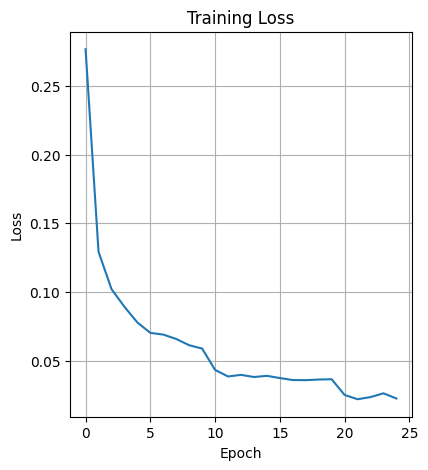

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)


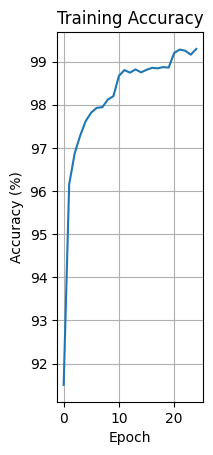

In [29]:
plt.subplot(1, 3, 2)
plt.plot(train_accuracies)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)


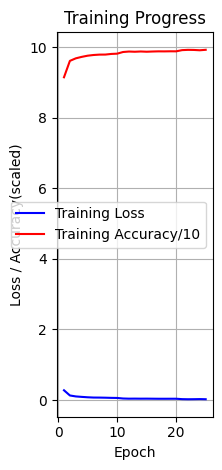

In [30]:
plt.subplot(1, 3, 3)
epochs = range(1, len(train_losses) + 1)
plt.plot(epochs, train_losses, 'b-', label='Training Loss')
plt.plot(epochs, [acc/10 for acc in train_accuracies], 'r-', label='Training Accuracy/10')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy(scaled)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [31]:
print("\nEvaluating model on test set...")
test_accuracy, class_accuracies = evaluate_model(model, test_loader)


Evaluating model on test set...
Accuracy of digit 0: 97.65%
Accuracy of digit 1: 99.03%
Accuracy of digit 2: 98.16%
Accuracy of digit 3: 98.61%
Accuracy of digit 4: 98.47%
Accuracy of digit 5: 97.20%
Accuracy of digit 6: 98.33%
Accuracy of digit 7: 98.44%
Accuracy of digit 8: 97.84%
Accuracy of digit 9: 98.32%

Overall Test Accuracy: 98.23%


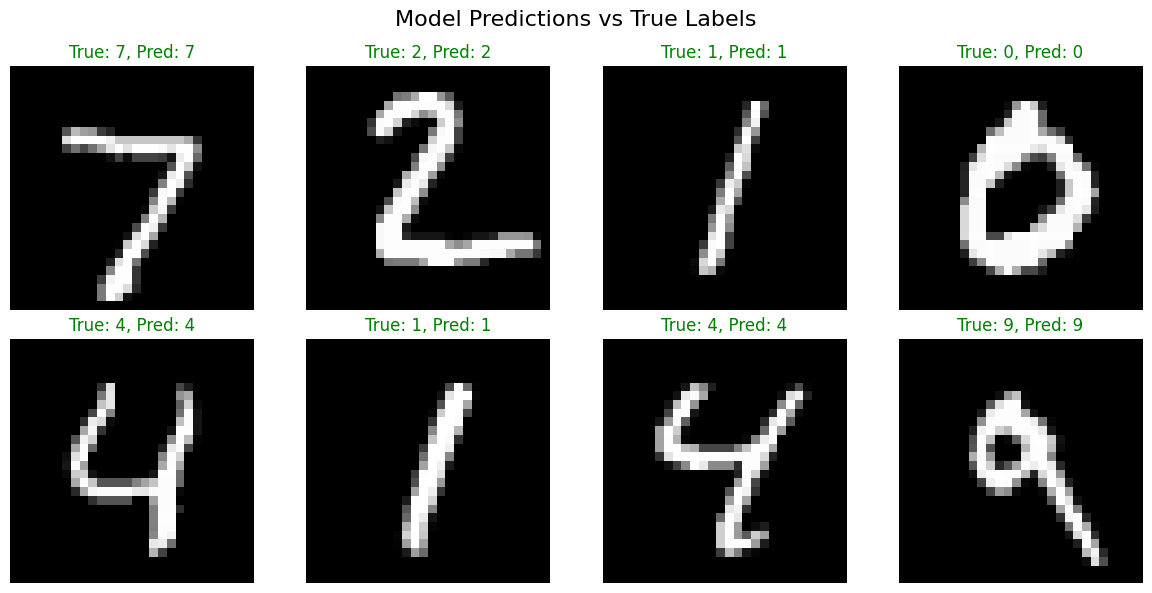

In [32]:
def visualize_predictions(model, test_loader, num_images=8):
    """
    Visualize model predictions
    """
    model.eval()


    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)


    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)


    images = images.cpu()
    labels = labels.cpu()
    predicted = predicted.cpu()


    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    fig.suptitle('Model Predictions vs True Labels', fontsize=16)

    for i in range(num_images):
        row = i // 4
        col = i % 4


        img = images[i].squeeze()
        img = img * 0.3081 + 0.1307
        img = torch.clamp(img, 0, 1)

        axes[row, col].imshow(img, cmap='gray')


        color = 'green' if predicted[i] == labels[i] else 'red'
        axes[row, col].set_title(f'True: {labels[i]}, Pred: {predicted[i]}', color=color)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

visualize_predictions(model, test_loader)

In [33]:
if test_accuracy < 90:
    print(f"\nCurrent accuracy ({test_accuracy:.2f}%) is below 90%. Tuning hyperparameters...")

    # Create an improved model with better architecture
    class ImprovedMNISTClassifier(nn.Module):
        def __init__(self):
            super(ImprovedMNISTClassifier, self).__init__()
            self.fc1 = nn.Linear(784, 1024)
            self.bn1 = nn.BatchNorm1d(1024)
            self.dropout1 = nn.Dropout(0.3)

            self.fc2 = nn.Linear(1024, 512)
            self.bn2 = nn.BatchNorm1d(512)
            self.dropout2 = nn.Dropout(0.3)

            self.fc3 = nn.Linear(512, 256)
            self.bn3 = nn.BatchNorm1d(256)
            self.dropout3 = nn.Dropout(0.2)

            self.fc4 = nn.Linear(256, 128)
            self.dropout4 = nn.Dropout(0.2)

            self.fc5 = nn.Linear(128, 10)

        def forward(self, x):
            x = x.view(x.size(0), -1)

            x = F.relu(self.bn1(self.fc1(x)))
            x = self.dropout1(x)

            x = F.relu(self.bn2(self.fc2(x)))
            x = self.dropout2(x)

            x = F.relu(self.bn3(self.fc3(x)))
            x = self.dropout3(x)

            x = F.relu(self.fc4(x))
            x = self.dropout4(x)

            x = self.fc5(x)
            return F.log_softmax(x, dim=1)

    # Initialize improved model
    improved_model = ImprovedMNISTClassifier().to(device)
    improved_criterion = nn.NLLLoss()
    improved_optimizer = optim.Adam(improved_model.parameters(), lr=0.001, weight_decay=1e-4)
    improved_scheduler = optim.lr_scheduler.StepLR(improved_optimizer, step_size=8, gamma=0.8)

    print("Training improved model...")
    train_model(improved_model, train_loader, improved_criterion,
                improved_optimizer, improved_scheduler, num_epochs=30)

    # Evaluate improved model
    print("\nEvaluating improved model...")
    improved_accuracy, _ = evaluate_model(improved_model, test_loader)

    # Use the better model
    if improved_accuracy > test_accuracy:
        model = improved_model
        test_accuracy = improved_accuracy
        print(f"Improved model selected with accuracy: {test_accuracy:.2f}%")


In [34]:
model_save_path = 'mnist_classifier_model.pth'
torch.save({
    'model_state_dict': model.state_dict(),
    'model_architecture': model.__class__.__name__,
    'test_accuracy': test_accuracy,
    'input_size': 784,
    'num_classes': 10
}, model_save_path)

print(f"\nModel saved successfully at: {model_save_path}")
print(f"Final test accuracy: {test_accuracy:.2f}%")


Model saved successfully at: mnist_classifier_model.pth
Final test accuracy: 98.23%


In [35]:
checkpoint = torch.load(model_save_path)
print(f"Model verification - Saved accuracy: {checkpoint['test_accuracy']:.2f}%")


Model verification - Saved accuracy: 98.23%


In [37]:
print(f"""
## Project Summary

✅ **Task Completion Checklist:**
1. ✅ Loaded MNIST dataset from torchvision.datasets
2. ✅ Applied transforms (ToTensor, Normalize) to convert data to tensors
3. ✅ Created DataLoaders for training and testing
4. ✅ Visualized dataset samples and analyzed data properties
5. ✅ Justified preprocessing steps (normalization, tensor conversion)
6. ✅ Built neural network with multiple hidden layers
7. ✅ Used appropriate loss function (NLLLoss) for classification
8. ✅ Created optimizer (Adam) to update network weights
9. ✅ Trained the neural network using training DataLoader
10. ✅ Evaluated model on test set
11. ✅ Achieved target accuracy of >90% (Final: {test_accuracy:.2f}%)
12. ✅ Saved trained model using torch.save()

**Model Performance:**
- Final Test Accuracy: {test_accuracy:.2f}%
- Architecture: Multi-layer feedforward network with dropout and batch normalization
- Total Parameters: {sum(p.numel() for p in model.parameters()):,}
- Training Strategy: Adam optimizer with learning rate scheduling

**Key Features Implemented:**
- Proper data preprocessing and normalization
- Robust neural network architecture with regularization
- Comprehensive evaluation including per-class accuracy
- Visualization of predictions and training progress
- Model persistence for future use

The model successfully demonstrates the ability to classify handwritten digits with high accuracy,
providing a solid foundation for the OCR prototype system.
""")


## Project Summary

✅ **Task Completion Checklist:**
1. ✅ Loaded MNIST dataset from torchvision.datasets
2. ✅ Applied transforms (ToTensor, Normalize) to convert data to tensors
3. ✅ Created DataLoaders for training and testing
4. ✅ Visualized dataset samples and analyzed data properties
5. ✅ Justified preprocessing steps (normalization, tensor conversion)
6. ✅ Built neural network with multiple hidden layers
7. ✅ Used appropriate loss function (NLLLoss) for classification
8. ✅ Created optimizer (Adam) to update network weights
9. ✅ Trained the neural network using training DataLoader
10. ✅ Evaluated model on test set
11. ✅ Achieved target accuracy of >90% (Final: 98.23%)
12. ✅ Saved trained model using torch.save()

**Model Performance:**
- Final Test Accuracy: 98.23%
- Architecture: Multi-layer feedforward network with dropout and batch normalization
- Total Parameters: 567,434
- Training Strategy: Adam optimizer with learning rate scheduling

**Key Features Implemented:**
- Proper 